# Imports

In [128]:
import geojson as gj
import matplotlib.pyplot as plt
import folium as fl
import geopandas as gpd
import json
import pandas as pd
import networkx as nx

# Loading the SciGRID data

In [129]:
# Load all the GeoDataFrames into one folium map
m = fl.Map(location=[60.0, 10.0], zoom_start=5)
fl.GeoJson('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_BorderPoints.geojson', name='Border Points', style_function=lambda x: {'color': 'red'}).add_to(m)
fl.GeoJson('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_Compressors.geojson', name='Compressors', style_function=lambda x: {'color': 'blue'}).add_to(m)
fl.GeoJson('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_EntryPoints.geojson', name='Entry Points', style_function=lambda x: {'color': 'green'}).add_to(m)
fl.GeoJson('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_InterConnectionPoints.geojson', name='InterConnection Points', style_function=lambda x: {'color': 'orange'}).add_to(m)
fl.GeoJson('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_LNGs.geojson', name='LNGs', style_function=lambda x: {'color': 'purple'}).add_to(m)
fl.GeoJson('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_Nodes.geojson', name='Nodes', style_function=lambda x: {'color': 'black'}).add_to(m)
fl.GeoJson('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_PipeSegments.geojson', name='Pipe Segments', style_function=lambda x: {'color': 'brown'}).add_to(m)
fl.GeoJson('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_Storages.geojson', name='Storages', style_function=lambda x: {'color': 'pink'}).add_to(m)
fl.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('IGGIN.html')

# Data Exploration

## Nodes

In [130]:
# Load the file "/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_Nodes.geojson" into a GeoDataFrame
nodes = gpd.read_file('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_Nodes.geojson')

# Print the first 5 rows of the GeoDataFrame
nodes.head()

,name,id,country_code,tags,param,method,geometry
0,N_0,NO_N_0,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (6.79720 65.10640)
1,N_1,NO_N_1,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (5.19357 59.33286)
2,N_2,NO_N_2,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (2.89575 60.56023)
3,N_3,NO_N_3,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (2.89614 60.78219)
4,N_4,NO_N_4,NO,{},"{'eic_code': None, 'elevation_m': None, 'exact...","{'eic_code': None, 'elevation_m': None, 'exact...",POINT (3.29837 54.78877)


## Pipelines

In [131]:
# Open the file: "/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_PipeSegments.csv" as a GeoDataFrame: gdf
pipelines_gdf = gpd.read_file('/Users/johanmasvie/programming/tiø4900/master_thesis/Scigrid_data/IGGIN_PipeSegments.csv')

# Split the 'param' column into separate columns
pipelines_gdf['param'] = pipelines_gdf['param'].apply(lambda x: json.loads(x.replace("'", '"')))
param_df = pd.json_normalize(pipelines_gdf['param'])
pipelines_gdf = pipelines_gdf.drop(columns=['param']).join(param_df)

# Split the "country_code" column into two separate columns. "['ES', 'ES']" is an example of a value in the "country_code" column
pipelines_gdf['country_code'] = pipelines_gdf['country_code'].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", '').split(', '))
country_code_df = pd.DataFrame(pipelines_gdf['country_code'].to_list(), columns=['country_code_1', 'country_code_2'])
pipelines_gdf = pipelines_gdf.drop(columns=['country_code']).join(country_code_df)

# Split the node_id column into two separate columns. "['INET_N_23', 'INET_N_295']" is an example of a value in the "node_id" column
pipelines_gdf['node_id'] = pipelines_gdf['node_id'].apply(lambda x: x.replace('[', '').replace(']', '').replace("'", '').split(', '))
node_id_df = pd.DataFrame(pipelines_gdf['node_id'].to_list(), columns=['node_id_1', 'node_id_2'])
pipelines_gdf = pipelines_gdf.drop(columns=['node_id']).join(node_id_df)

# Print the first few rows of the GeoDataFrame
pipelines_gdf.head()

,id,name,source_id,lat,long,comment,uncertainty,method,tags,geometry,...,long_mean,max_cap_M_m3_per_d,max_pressure_bar,num_compressor,start_year,waterDepth_m,country_code_1,country_code_2,node_id_1,node_id_2
0,INET_PL_1,AlcazarDeSanJuan_Chinchilla,['INET_PL_1'],"[39.3900748, 38.892435]","[-3.3500984, -1.719831]",None,"{'diameter_mm': 187.6635273358689, 'end_year':...","{'diameter_mm': 'Lasso', 'end_year': 'make_Att...",{},None,...,-2.534965,45.510317,75.0,3.0,1983.0,292.043469,ES,ES,INET_N_23,INET_N_295
1,INET_PL_3,Tarancon_Madrid,['INET_PL_3'],"[40.01, 40.223]","[-3.207, -3.681]",None,"{'diameter_mm': 187.6635273358689, 'end_year':...","{'diameter_mm': 'Lasso', 'end_year': 'make_Att...",{},None,...,-3.444000,45.510317,75.0,3.0,1983.0,292.043469,ES,ES,INET_N_1460,INET_N_904
2,INET_PL_5,Alessandria_Cortemaggiore,['INET_PL_5'],"[44.991076, 44.90008]","[9.920891, 8.60944]",None,"{'diameter_mm': 0, 'end_year': 20, 'is_H_gas':...","{'diameter_mm': 'raw', 'end_year': 'make_Attri...",{},None,...,9.265165,45.510317,75.0,3.0,1983.0,292.043469,IT,IT,INET_N_317,INET_N_26
3,INET_PL_7,Almendralejo_Badajoz,['INET_PL_7'],"[38.711202, 38.87665]","[-6.382539, -6.9714]",None,"{'diameter_mm': 187.6635273358689, 'end_year':...","{'diameter_mm': 'Lasso', 'end_year': 'make_Att...",{},None,...,-6.676970,45.510317,75.0,3.0,1983.0,292.043469,ES,ES,INET_N_36,INET_N_108
4,INET_PL_9,Almendralejo_Zamora,['INET_PL_9'],"[38.711202, 41.506]","[-6.382539, -5.644]",None,"{'diameter_mm': 187.6635273358689, 'end_year':...","{'diameter_mm': 'Lasso', 'end_year': 'make_Att...",{},None,...,-6.013269,45.510317,75.0,3.0,1983.0,292.043469,ES,ES,INET_N_36,INET_N_1653


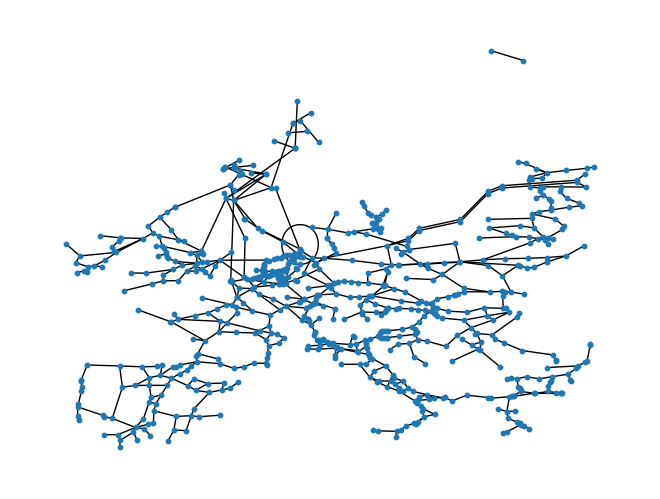

In [132]:
# Using the nodes GeoDataFrame, create a graph G. Use the "geometry" column to for the position of the nodes
G = nx.Graph()
for i, row in nodes.iterrows():
    G.add_node(row['id'], pos=(row['geometry'].x, row['geometry'].y))

# Using the pipelines GeoDataFrame, add edges to the graph G
for i, row in pipelines_gdf.iterrows():
    G.add_edge(row['node_id_1'], row['node_id_2'])

# Color each connected component of the graph G differently
colors = range(len(list(nx.connected_components(G))))
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=10)
plt.show()




In [133]:
# Using networkx to create a graph from the GeoDataFrame. Let each row in the GeoDataFrame be an edge in the graph, where the nodes are the values in the "node_id_1" and "node_id_2" columns.
# Add an attribute called "capacity" to each edge in the graph, where the value of the attribute is the value in the "max_cap_M_m3_per_d" column of the GeoDataFrame
G = nx.from_pandas_edgelist(pipelines_gdf, 'node_id_1', 'node_id_2', ['max_cap_M_m3_per_d'])
nx.set_edge_attributes(G, {tuple(row[['node_id_1', 'node_id_2']]): row['max_cap_M_m3_per_d'] for _, row in pipelines_gdf.iterrows()}, 'capacity')



In [134]:
components = nx.connected_components(G)

num_components = nx.number_connected_components(G)

print(num_components)

18
